# **Traffic Signs Classification**

! pip install imgaug


In [37]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from imgaug import augmenters  as iaa
import cv2
import random

**1- Mount google drive and import dataset**



In [38]:
#mount google drive
#drive.mount('/content/drive')

In [39]:
training_file = "DatasetClassification/train.p"
validation_file= "DatasetClassification/valid.p"
testing_file = "DatasetClassification/test.p"

with open(training_file, mode='rb') as f:
    train = pkl.load(f)
with open(validation_file, mode='rb') as f:
    valid = pkl.load(f)
with open(testing_file, mode='rb') as f:
    test = pkl.load(f)

In [40]:
WIDTH = 32
HEIGHT = 32

In [41]:
X_train = train['features']
y_train = train['labels']

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [42]:
X_valid = valid['features']
y_valid = valid['labels']

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


**2- About the Dataset**

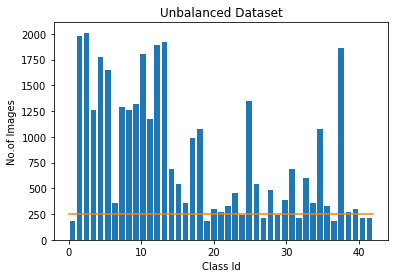

In [43]:
num_bins = 43
samples_per_bin = 250
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.plot((np.min(y_train), np.max(y_train)), (samples_per_bin, samples_per_bin))
plt.title('Unbalanced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

_, bins = np.histogram(y_train, num_bins)

In [44]:
print(bins)

[ 0.          0.97674419  1.95348837  2.93023256  3.90697674  4.88372093
  5.86046512  6.8372093   7.81395349  8.79069767  9.76744186 10.74418605
 11.72093023 12.69767442 13.6744186  14.65116279 15.62790698 16.60465116
 17.58139535 18.55813953 19.53488372 20.51162791 21.48837209 22.46511628
 23.44186047 24.41860465 25.39534884 26.37209302 27.34883721 28.3255814
 29.30232558 30.27906977 31.25581395 32.23255814 33.20930233 34.18604651
 35.1627907  36.13953488 37.11627907 38.09302326 39.06976744 40.04651163
 41.02325581 42.        ]


In [45]:
#Balance the data
print ('total data:', len(X_train))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(y_train)):
    if y_train[i]>= bins[j] and y_train[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  #print(list_)
  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))

X_train = np.delete(X_train, remove_list, axis=0)
print ('remaining images:', len (X_train))

y_train = np.delete(y_train, remove_list, axis=0)
print ('remaining labels:', len (y_train))

total data: 34799
removed: 24439
remaining images: 10360
remaining labels: 10360


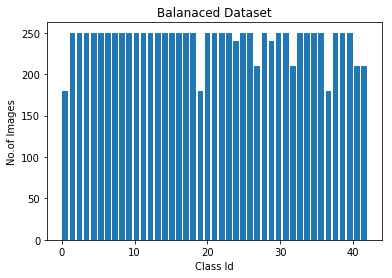

In [46]:
num_bins = 43
samples_per_bin = 500
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

**3- Image Augmentation to Artifically Expand the Dataset**

In [47]:
#image augmentation
def zoom(image):
  zoom_img = iaa.Affine(scale = (0.9, 1.3))
  image = zoom_img.augment_image(image)
  return image

31


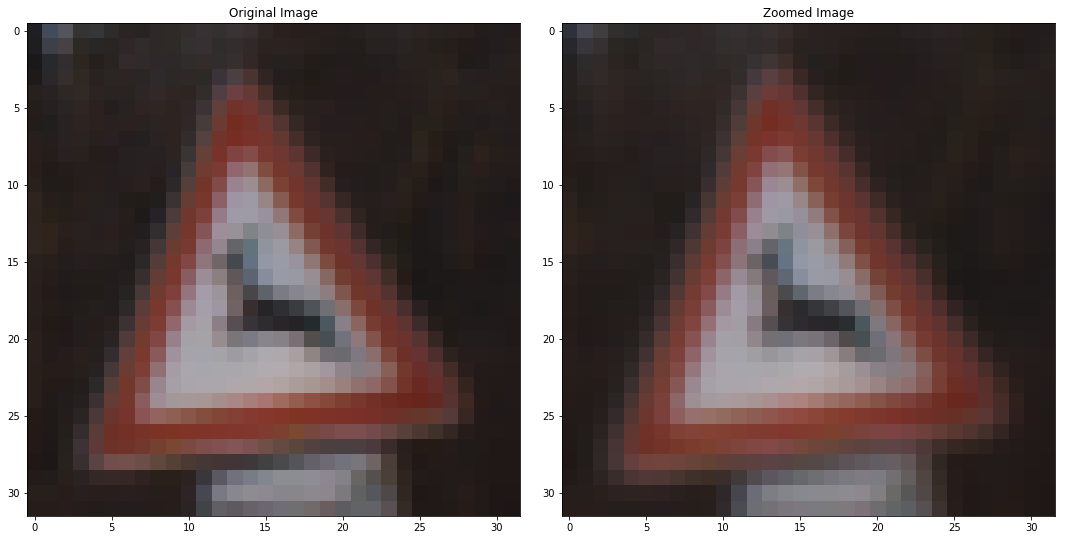

In [48]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

print(label)

In [49]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

7


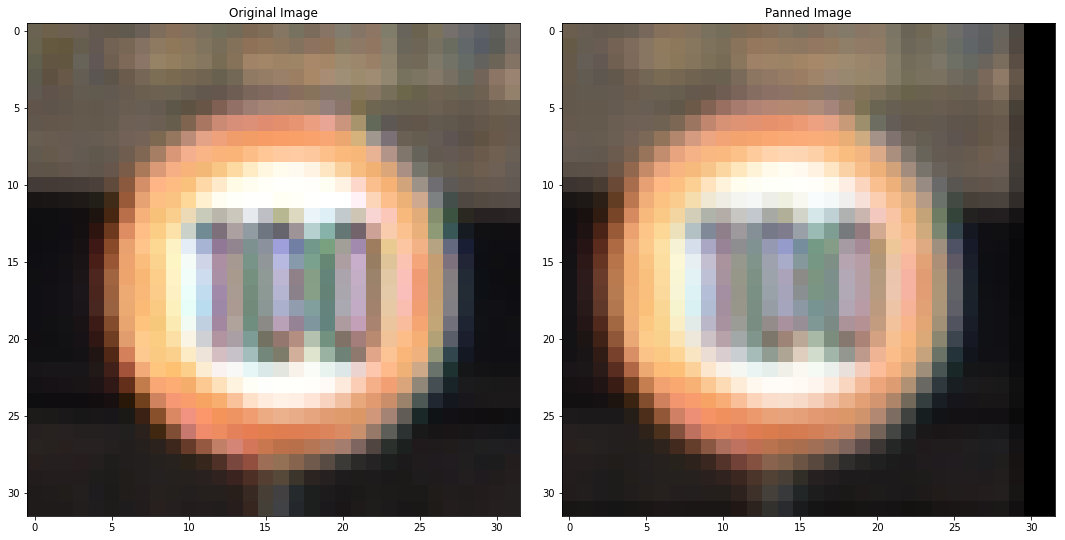

In [50]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

print(label)

In [51]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.8))
  image = brightness.augment_image(image)
  return image

26


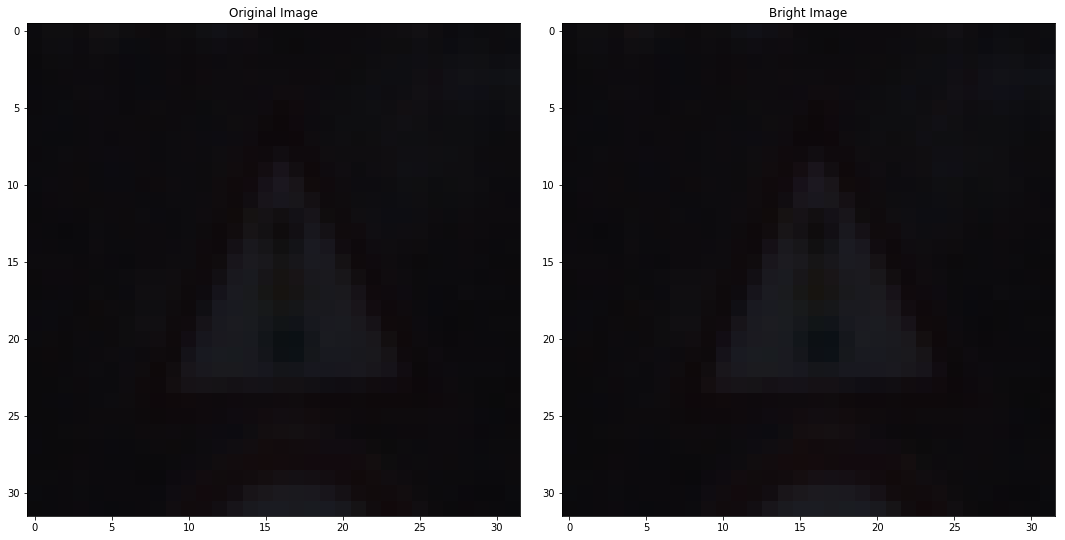

In [52]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Bright Image')

print(label)

In [53]:
augmented_zoom_image = []
augmented_zoom_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  zoomed_img = zoom(img)
  augmented_zoom_image.append(zoomed_img)
  augmented_zoom_label.append(label)

In [54]:
augmented_pan_image = []
augmented_pan_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  panned_img = pan(img)
  augmented_pan_image.append(panned_img)
  augmented_pan_label.append(label)

In [55]:
augmented_bright_image = []
augmented_bright_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  bright_img = img_random_brightness(img)
  augmented_bright_image.append(bright_img)
  augmented_bright_label.append(label)

In [56]:
print('Balanced Dataset Before Augmentation(Image):', X_train.shape)
print('Balanced Dataset Before Augmentation(Label):', y_train.shape)
#change to np array
augmented_zoom_image = np.array(augmented_zoom_image)
augmented_pan_image = np.array(augmented_pan_image)
augmented_bright_image = np.array(augmented_bright_image)
X_train = np.array(X_train)
#concatenate
X_train = np.concatenate((X_train, augmented_zoom_image, augmented_pan_image, augmented_bright_image))


#change to np array
augmented_zoom_label = np.array(augmented_zoom_label) #250
augmented_pan_label = np.array(augmented_pan_label) #250
augmented_bright_label = np.array(augmented_bright_label) #250
y_train = np.array(y_train) #250
#concatenate
y_train = np.concatenate((y_train, augmented_zoom_label, augmented_pan_label, augmented_bright_label))

print('Balanced Dataset After Augmentation(Image):', X_train.shape)
print('Balanced Dataset After Augmentation(Label):', y_train.shape)

Balanced Dataset Before Augmentation(Image): (10360, 32, 32, 3)
Balanced Dataset Before Augmentation(Label): (10360,)
Balanced Dataset After Augmentation(Image): (41440, 32, 32, 3)
Balanced Dataset After Augmentation(Label): (41440,)


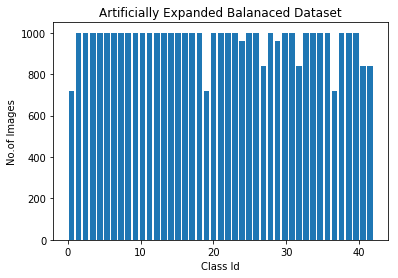

In [57]:
num_bins = 43
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Artificially Expanded Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

## Pruning, Quantization and compression

In [58]:
import tensorflow_model_optimization as tfmot
import numpy as np
import tensorflow as tf
import tempfile

In [59]:
loaded_model = tf.keras.models.load_model('traffic.h5')

In [60]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

In [61]:
# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

In [62]:
num_images = 10360 * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

In [63]:
# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

In [64]:
model_for_pruning = prune_low_magnitude(loaded_model, **pruning_params)

D:\Soft\Anaconda5.3.0\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
D:\Soft\Anaconda5.3.0\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
D:\Soft\Anaconda5.3.0\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


In [65]:
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 28, 28, 24)       3626      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_conv2d_  (None, 24, 24, 36)       43238     
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 20, 20, 48)       86450     
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 18, 18, 64)       55362     
 3 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 16, 16, 64)       7

### Train and evaluate the model against baseline

In [67]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

#Dont do this
#change to hot encoded array!!
y_train = labels_to_one_hot(y_train, 43)
y_valid = labels_to_one_hot(y_valid, 43)

print(y_train.shape)
print(y_valid.shape)

In [68]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing th

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

D:\Soft\Anaconda5.3.0\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.e

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1166/1166 [==============================] - 92s 77ms/step - loss: 0.2686 - accuracy: 0.9346 - val_loss: 0.1169 - val_accuracy: 0.9754
Epoch 2/2
1166/1166 [==============================] - 82s 70ms/step - loss: 0.0442 - accuracy: 0.9881 - val_loss: 0.0598 - val_accuracy: 0.9901


In [69]:
X_test = test['features']
y_test = test['labels']

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


#Dont do one hot
y_test = labels_to_one_hot(y_test, 43)

In [ ]:
_, baseline_model_accuracy = model_for_pruning.evaluate(
    test_images, test_labels, verbose=0)

In [71]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
   X_test, y_test, verbose=0)

#print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)

Pruned test accuracy: 0.966587483882904


### Save model and compress

In [73]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: C:\Users\devji\AppData\Local\Temp\tmpi2pvesmz.h5


In [74]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

INFO:tensorflow:Assets written to: C:\Users\devji\AppData\Local\Temp\tmptow3auzl\assets


INFO:tensorflow:Assets written to: C:\Users\devji\AppData\Local\Temp\tmptow3auzl\assets


Saved pruned TFLite model to: C:\Users\devji\AppData\Local\Temp\tmpe_yn_ck0.tflite


In [75]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [76]:
#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

Size of gzipped pruned Keras model: 5171556.00 bytes
Size of gzipped pruned TFlite model: 5112221.00 bytes


## Create a 10x smaller model from combining pruning and quantization

In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

print("Size of gzipped only pruned Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: C:\Users\devji\AppData\Local\Temp\tmp65ubpuuh\assets


INFO:tensorflow:Assets written to: C:\Users\devji\AppData\Local\Temp\tmp65ubpuuh\assets


Saved quantized and pruned TFLite model to: C:\Users\devji\AppData\Local\Temp\tmp2welsv5w.tflite
Size of gzipped baseline Keras model: 5993732.00 bytes
Size of gzipped pruned and quantized TFlite model: 1469503.00 bytes


### See persistence of accuracy from TF to TFLite

In [78]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on ever y image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(X_test):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == y_test).mean()
  return accuracy

In [79]:
interpreter = tf.lite.Interpreter(model_content=quantized_and_pruned_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Pruned and quantized TFLite test_accuracy:', test_accuracy)
print('Pruned TF test accuracy:', model_for_pruning_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.
Evaluated on 10000 results so far.
Evaluated on 11000 results so far.
Evaluated on 12000 results so far.


Pruned and quantized TFLite test_accuracy: 0.9666666666666667
Pruned TF test accuracy: 0.966587483882904


**3- Building a CNN on Tensorflow(Keras)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape, Input, Concatenate, GlobalMaxPool2D
from tensorflow.keras.models import Model

In [ ]:
print(keras.__version__)

In [ ]:
print(X_train[1].shape)

In [ ]:
def CNN_model():
  model = Sequential()

  #1st layer
  model.add(Conv2D(24, kernel_size=(5,5), strides=(1,1), input_shape=(WIDTH, HEIGHT,3), activation='relu'))

  #2nd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(1,1), activation='relu'))

  #3rd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(1,1), activation='relu'))
  
  #4th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))


  #1st Dense Layer
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))

  #2nd Dense Layer
  model.add(Dense(125, activation='relu'))
  #model.add(Dropout(0.5))

  #3rd Dense Layer
  model.add(Dense(75, activation='relu'))
  #model.add(Dropout(0.5))

  #output
  model.add(Dense(43, activation='softmax'))
  
  #Compile model
  model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = CNN_model()
print(model.summary())

In [ ]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

In [ ]:
#change to hot encoded array!!
y_train = labels_to_one_hot(y_train, 43)
y_valid = labels_to_one_hot(y_valid, 43)

print(y_train.shape)
print(y_valid.shape)

**4- Training the CNN**

In [ ]:
history = model.fit(x=X_train, y=y_train, 
                    batch_size=32, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_valid, y_valid), 
                    shuffle=True)

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
X_test = test['features']
y_test = test['labels']

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

In [ ]:
y_test = labels_to_one_hot(y_test, 43)

In [ ]:
index = random.randint(0,len(X_test)-1)
img_testing = X_test[index]
label_testing = y_test[index]

plt.imshow(img_testing)
print ("Actual: ", np.argmax(label_testing))
img_testing = img_testing.reshape(-1, WIDTH,HEIGHT,3)

print ("Prediction: ", np.argmax(model.predict(img_testing)))

**5- Evaluate and Save the Trained Model**

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
model.save('traffic.h5')

In [ ]:
import tempfile

In [ ]:
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)